In [4]:
import pandas as pd
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import math
from scipy.stats import iqr
from numpy import linalg
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import butter, lfilter, freqz

In [5]:
## Features

def mean(x, y, z):
    """Calculates mean"""
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    mean_z = np.mean(z)
    return mean_x, mean_y, mean_z

def std_dev(x, y, z):
    """Calculates standard deviation"""
    std_x = np.std(x)
    std_y = np.std(y)
    std_z = np.std(z)
    return std_x, std_y, std_z  
    
def mad(x, y, z):
    """Calculates median absolute deviation"""
    mad_x = np.median(np.abs(x - np.median(x)))
    mad_y = np.median(np.abs(y - np.median(y)))
    mad_z = np.median(np.abs(z - np.median(z)))
    return mad_x, mad_y, mad_z

def minimum(x, y, z):
    """Calculates minimum"""
    return min(x), min(y), min(z)

def maximum(x, y, z):
    """Calculates maximum"""
    return max(x), max(y), max(z)

def energy_measure(x, y, z):
    """Calculates energy measures"""
    em_x = np.mean(np.square(x))
    em_y = np.mean(np.square(y))
    em_z = np.mean(np.square(z))
    return em_x, em_y, em_z

def inter_quartile_range(x, y, z):
    """Calculates inter-quartile range"""
    iqr_x = np.subtract(*np.percentile(x, [75, 25]))
    iqr_y = np.subtract(*np.percentile(y, [75, 25]))
    iqr_z = np.subtract(*np.percentile(z, [75, 25]))
    return iqr_x, iqr_y, iqr_z

def sma(x, y, z):
    """Calculates signal magnitude area"""   
    abs_x = np.absolute(x)
    abs_y = np.absolute(y)
    abs_z = np.absolute(z)
    return np.mean(abs_x+abs_y+abs_z)

def skewness(x, y, z):
    """Calculates skewness"""
    skew_x=stats.skew(x)
    skew_y=stats.skew(y)
    skew_z=stats.skew(z)
    return skew_x, skew_y, skew_z

def kurt(x, y, z):
    """Calculates kurtosis"""
    kurt_x = stats.kurtosis(x,fisher=False)
    kurt_y = stats.kurtosis(y,fisher=False)
    kurt_z = stats.kurtosis(z,fisher=False)
    return kurt_x, kurt_y, kurt_z
    
def max_index(x, y, z):
    """Calculates index of maximum"""
  #  [val_x, idx_x] = max(x)
    idx_x = np.argmax(x)
   # [val_y, idx_y] = max(y)
    idx_y = np.argmax(y)
    #[val_z, idx_z] = max(z)
    idx_z = np.argmax(z)
    return idx_x, idx_y, idx_z
    
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y



In [6]:
def process_acc(input_df, columns, output_df, freq_flag):
    i = 0
  
    while i < len(input_df[0]):
        max_window = input_df[0][i] + 5000
        min_window = input_df[0][i]
        if i != 0:                                  #handling overlap
            min_window -= 2500
            max_window -= 2500
            i -= int(count/2)
        x = [input_df[1][i]]
        y = [input_df[2][i]]
        z = [input_df[3][i]]
       
        
        count = 0
        while min_window < max_window:
            i += 1
            count += 1
            try:
                x.append(input_df[1][i])
                y.append(input_df[2][i])
                z.append(input_df[3][i])
                min_window = input_df[0][i]
            except KeyError:
                break
        
        sma_val = (sma(x,y,z), )
      
        
        if freq_flag == 0:
            acc_data = list(mean(x, y, z)+std_dev(x, y, z)+mad(x, y, z)+minimum(x, y, z)+maximum(x, y, z)+energy_measure(x, y, z)+inter_quartile_range(x, y, z)+sma_val)
        
        
        else:
            acc_data = list(mean(x, y, z)+std_dev(x, y, z)+mad(x, y, z)+minimum(x, y, z)+maximum(x, y, z)+energy_measure(x, y, z)+inter_quartile_range(x, y, z)+sma_val+
                            skewness(x, y, z)+kurt(x, y, z)+max_index(x, y, z))
        
        
        
        output_df = output_df.append(pd.Series(acc_data, index=columns), ignore_index=True)
    return output_df

In [7]:
def process_gyr(input_df, columns, output_df, freq_flag):

    i = 0
    while i < len(input_df[0]):
        max_window = input_df[0][i] + 5000
        min_window = input_df[0][i]
        if i != 0:                                                                 #handling overlap
            min_window -= 2500
            max_window -= 2500
            i -= int(count/2)
        x = [input_df[1][i]]
        y = [input_df[2][i]]
        z = [input_df[3][i]]
        count = 0
        while min_window < max_window:
            i += 1
            count += 1
            try:
                x.append(input_df[1][i])
                y.append(input_df[2][i])
                z.append(input_df[3][i])
                min_window = input_df[0][i]
            except KeyError:
                break
        
        
        label = (input_df[5][1], )
        sma_val = (sma(x,y,z), )

       # gy_data = list(mean(x, y, z)+std_dev(x, y, z)+mad(x, y, z)+minimum(x, y, z)+maximum(x, y, z)+energy_measure(x, y, z)+inter_quartile_range(x, y, z)+sma_val+label) 
        #output_df = output_df.append(pd.Series(gy_data, index=columns), ignore_index=True)
        
        
        if freq_flag == 0:
            gy_data = list(mean(x, y, z)+std_dev(x, y, z)+mad(x, y, z)+minimum(x, y, z)+maximum(x, y, z)+energy_measure(x, y, z)+inter_quartile_range(x, y, z)+sma_val+label)
        
        
        else:
            gy_data = list(mean(x, y, z)+std_dev(x, y, z)+mad(x, y, z)+minimum(x, y, z)+maximum(x, y, z)+energy_measure(x, y, z)+inter_quartile_range(x, y, z)+sma_val+
                            skewness(x, y, z)+kurt(x, y, z)+max_index(x, y, z))
        
        
        
        output_df = output_df.append(pd.Series(gy_data, index=columns), ignore_index=True)
        
        
    return output_df

In [8]:
def process_mag(input_df, columns, output_df, freq_flag):
    mag = np.linalg.norm(input_df.iloc[:,1:4], axis = 1)
    input_df[6] = mag.tolist()
    
    i = 0
    while i < len(input_df[0]):
        max_window = input_df[0][i] + 5000
        min_window = input_df[0][i]
        if i != 0:                                  #handling overlap
            min_window -= 2500
            max_window -= 2500
            i -= int(count/2)
        x = [input_df[6][i]]
        
        
        count = 0
        while min_window < max_window:
            i += 1
            count += 1
            try:
                x.append(input_df[6][i])
                min_window = input_df[0][i]
            except KeyError:
                break
        
        mean = (np.mean(x),)
        std_dev = (np.std(x),)
        mad = (np.median(np.abs(x - np.median(x))),)
        minimum = (np.min(x),)
        maximum = (np.max(x),)
        energy_measure = (np.mean(np.square(x)),)
        inter_quartile_range = (np.subtract(*np.percentile(x, [75, 25])),)
        sma_val = (np.mean(np.absolute(x)),)
        
        
        
        if freq_flag == 0:
            acc_data = list(mean+std_dev+mad+minimum+maximum+energy_measure+inter_quartile_range+sma_val)
        else:
            skew = (stats.skew(x),)
            kur = (stats.kurtosis(x,fisher=False),)
            m_idx = (np.argmax(x),)
            acc_data = list(mean+std_dev+mad+minimum+maximum+energy_measure+inter_quartile_range+sma_val+skew+kur+m_idx)
        
        output_df = output_df.append(pd.Series(acc_data, index=columns), ignore_index=True)

    return output_df

In [9]:
def hist_activities(df):
    df['label'].value_counts().plot(kind='bar', title='Training examples by activity type')
    plt.show()
    
def plot_activity(activity, df):
    data = df[df.iloc[:, 5] == activity][[1, 2, 3]][:2000]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
        
def plot_act_signals(df):
    plot_activity("sitting", df)
    plt.ylabel('sitting')
    plt.show()
    plot_activity("walking", df)
    plt.ylabel('walking')
    plt.show()
    plot_activity("standing", df)
    plt.ylabel('standing')
    plt.show()
    plot_activity("laying_down", df)
    plt.ylabel('laying_down')
    plt.show()

In [10]:
def calc_jerk(acc, ts):
    jk = [0]* len(acc)
    for i in range(1,len(acc)):
        jk[i-1] = 1000*(acc[i] - acc[i-1])/(ts[i] - ts[i-1])
    return jk

def fmagnitude(num):
    return math.sqrt(num.real**2 + num.imag**2)

In [11]:
def get_session_dirs(path):
    path = path
    dirs = []
    dir_list = [x[0] for x in os.walk(path)]
    last_dirs = ["1_android.sensor.accelerometer.data.csv.gz","4_android.sensor.gyroscope.data.csv.gz"]
    dirs = []
    for each_dir in dir_list[2:]:

        if "data" in each_dir:
            dirs.append(each_dir)

    dirs.sort(key=lambda x:x[-22:])
    return dirs

In [14]:
def get_jerk(df):
    df[1] = calc_jerk(df[1],df[0])
    df[2] = calc_jerk(df[2],df[0])
    df[3] = calc_jerk(df[3],df[0])
    return df

def get_fft(df):
    df[1] = np.fft.fft(df[1])
    df[2] = np.fft.fft(df[2])
    df[3] = np.fft.fft(df[3])
    df[1] = [fmagnitude(j) for j in df[1]]
    df[2] = [fmagnitude(j) for j in df[2]]
    df[3] = [fmagnitude(j) for j in df[3]]
    return df

def five_point_smoothing(df):
    m=np.array(df[1])
    m_smooth = np.zeros(len(m))
    m_smooth = m;
    for i ,val in enumerate(m_smooth[2 : (len(m_smooth) -2)]):
        m_smooth[i] = (m_smooth[i-2] + m_smooth[i-1] + m_smooth[i] + m_smooth[i+1] + m_smooth[i+2])/5
    df[1] = m_smooth
        
    m=np.array(df[2])
    m_smooth = np.zeros(len(m))
    m_smooth = m;
    for i ,val in enumerate(m_smooth[2 : (len(m_smooth) -2)]):
        m_smooth[i] = (m_smooth[i-2] + m_smooth[i-1] + m_smooth[i] + m_smooth[i+1] + m_smooth[i+2])/5
    df[2] = m_smooth
    
    m = np.array(df[3])
    m_smooth = np.zeros(len(m))
    m_smooth = m;
    for i ,val in enumerate(m_smooth[2 : (len(m_smooth) -2)]):
        m_smooth[i] = (m_smooth[i-2] + m_smooth[i-1] + m_smooth[i] + m_smooth[i+1] + m_smooth[i+2])/5
    df[3] = m_smooth
    
    return df

In [ ]:
dirs = get_session_dirs("Sessions/")

tacc_cols = ['mean_acc_x', 'mean_acc_y', 'mean_acc_z', 
           'std_acc_x', 'std_acc_y', 'std_acc_z', 
           'mad_acc_x', 'mad_acc_y', 'mad_acc_z',
           'min_acc_x', 'min_acc_y', 'min_acc_z', 
           'max_acc_x', 'max_acc_y', 'max_acc_z', 
           'em_acc_x', 'em_acc_y', 'em_acc_z', 
           'iqr_acc_x', 'iqr_acc_y', 'iqr_acc_z', 
           'sma_acc']
out_acc_df = pd.DataFrame(columns = tacc_cols)

tacc_jerk_cols = ['mean_accj_x', 'mean_accj_y', 'mean_accj_z', 
               'std_accj_x', 'std_accj_y', 'std_accj_z', 
               'mad_accj_x', 'mad_accj_y', 'mad_accj_z',
               'min_accj_x', 'min_accj_y', 'min_accj_z', 
               'max_accj_x', 'max_accj_y', 'max_accj_z', 
               'em_accj_x', 'em_accj_y', 'em_accj_z', 
               'iqr_accj_x', 'iqr_accj_y', 'iqr_accj_z', 
               'sma_accj']
out_acc_jerk_df = pd.DataFrame(columns = tacc_jerk_cols)

tacc_mag_cols = ['mean_macc', 'std_macc', 'mad_macc', 'min_macc', 'max_macc', 'em_macc', 'iqr_macc', 'sma_macc']
acc_mag = pd.DataFrame(columns = tacc_mag_cols)

tacc_jmag_cols = ['mean_macc_jerk', 'std_macc_jerk', 'mad_macc_jerk', 'min_macc_jerk', 'max_macc_jerk', 
                 'em_macc_jerk', 'iqr_macc_jerk', 'sma_macc_jerk']
acc_jerk_mag = pd.DataFrame(columns = tacc_jmag_cols)

facc_cols = ['mean_facc_x', 'mean_facc_y', 'mean_facc_z', 
           'std_facc_x', 'std_facc_y', 'std_facc_z', 
           'mad_facc_x', 'mad_facc_y', 'mad_facc_z',
           'min_facc_x', 'min_facc_y', 'min_facc_z', 
           'max_facc_x', 'max_facc_y', 'max_facc_z', 
           'em_facc_x', 'em_facc_y', 'em_facc_z', 
           'iqr_facc_x', 'iqr_facc_y', 'iqr_facc_z', 
           'sma_facc', 
           'skew_facc_x', 'skew_facc_y', 'skew_facc_z', 
           'kurt_facc_x', 'kurt_facc_y', 'kurt_facc_z', 
           'idx_facc_x', 'idx_facc_y', 'idx_facc_z']
out_facc_df = pd.DataFrame(columns = facc_cols)

facc_jerk_cols = ['mean_faccj_x', 'mean_faccj_y', 'mean_faccj_z', 
               'std_faccj_x', 'std_faccj_y', 'std_faccj_z', 
               'mad_faccj_x', 'mad_faccj_y', 'mad_faccj_z',
               'min_faccj_x', 'min_faccj_y', 'min_faccj_z', 
               'max_faccj_x', 'max_faccj_y', 'max_faccj_z', 
               'em_faccj_x', 'em_faccj_y', 'em_faccj_z', 
               'iqr_faccj_x', 'iqr_faccj_y', 'iqr_faccj_z', 
               'sma_faccj', 
               'skew_faccj_x', 'skew_faccj_y', 'skew_faccj_z', 
               'kurt_faccj_x', 'kurt_faccj_y', 'kurt_faccj_z', 
               'idx_faccj_x', 'idx_faccj_y', 'idx_faccj_z']
out_facc_jerk_df = pd.DataFrame(columns = facc_jerk_cols)

facc_mag_cols = ['mean_mfacc', 'std_mfacc', 'mad_mfacc', 'min_mfacc', 'max_mfacc', 'em_mfacc', 'iqr_mfacc', 'sma_mfacc',
                'skew_mfacc', 'kurt_mfacc',  'idx_mfacc']
facc_mag = pd.DataFrame(columns = facc_mag_cols)

facc_jmag_cols = ['mean_mfacc_jerk', 'std_mfacc_jerk', 'mad_mfacc_jerk', 'min_mfacc_jerk', 'max_mfacc_jerk', 
                 'em_mfacc_jerk', 'iqr_mfacc_jerk', 'sma_mfacc_jerk', 'skew_mfacc_jerk', 'kurt_mfacc_jerk',  
                  'idx_mfacc_jerk']
facc_jerk_mag = pd.DataFrame(columns = facc_jmag_cols)

tgy_cols = ['mean_gy_x', 'mean_gy_y', 'mean_gy_z', 
           'std_gy_x', 'std_gy_y', 'std_gy_z', 
           'mad_gy_x', 'mad_gy_y', 'mad_gy_z',
           'min_gy_x', 'min_gy_y', 'min_gy_z', 
           'max_gy_x', 'max_gy_y', 'max_gy_z', 
           'em_gy_x', 'em_gy_y', 'em_gy_z', 
           'iqr_gy_x', 'iqr_gy_y', 'iqr_gy_z', 
           'sma_gy', 'label']
out_gy_df = pd.DataFrame(columns = tgy_cols)

tgy_jerk_cols = ['mean_gyj_x', 'mean_gyj_y', 'mean_gyj_z', 
               'std_gyj_x', 'std_gyj_y', 'std_gyj_z', 
               'mad_gyj_x', 'mad_gyj_y', 'mad_gyj_z',
               'min_gyj_x', 'min_gyj_y', 'min_gyj_z', 
               'max_gyj_x', 'max_gyj_y', 'max_gyj_z', 
               'em_gyj_x', 'em_gyj_y', 'em_gyj_z', 
               'iqr_gyj_x', 'iqr_gyj_y', 'iqr_gyj_z', 
               'sma_gyj']
out_gy_jerk_df = pd.DataFrame(columns = tgy_jerk_cols)

tgy_mag_cols = ['mean_mgy', 'std_mgy', 'mad_mgy', 'min_mgy', 'max_mgy', 'em_mgy', 'iqr_mgy', 'sma_mgy']
gy_mag = pd.DataFrame(columns = tgy_mag_cols)

tgy_jmag_cols = ['mean_mgy_jerk', 'std_mgy_jerk', 'mad_mgy_jerk', 'min_mgy_jerk', 'max_mgy_jerk', 
                 'em_mgy_jerk', 'iqr_mgy_jerk', 'sma_mgy_jerk']
gy_jerk_mag = pd.DataFrame(columns = tgy_jmag_cols)

fgy_cols = ['mean_fgy_x', 'mean_fgy_y', 'mean_fgy_z', 
           'std_fgy_x', 'std_fgy_y', 'std_fgy_z', 
           'mad_fgy_x', 'mad_fgy_y', 'mad_fgy_z',
           'min_fgy_x', 'min_fgy_y', 'min_fgy_z', 
           'max_fgy_x', 'max_fgy_y', 'max_fgy_z', 
           'em_fgy_x', 'em_fgy_y', 'em_fgy_z', 
           'iqr_fgy_x', 'iqr_fgy_y', 'iqr_fgy_z', 
           'sma_fgy', 
           'skew_fgy_x', 'skew_fgy_y', 'skew_fgy_z', 
           'kurt_fgy_x', 'kurt_fgy_y', 'kurt_fgy_z', 
           'idx_fgy_x', 'idx_fgy_y', 'idx_fgy_z']
out_fgy_df = pd.DataFrame(columns = fgy_cols)

fgy_jerk_cols = ['mean_fgyj_x', 'mean_fgyj_y', 'mean_fgyj_z', 
               'std_fgyj_x', 'std_fgyj_y', 'std_fgyj_z', 
               'mad_fgyj_x', 'mad_fgyj_y', 'mad_fgyj_z',
               'min_fgyj_x', 'min_fgyj_y', 'min_fgyj_z', 
               'max_fgyj_x', 'max_fgyj_y', 'max_fgyj_z', 
               'em_fgyj_x', 'em_fgyj_y', 'em_fgyj_z', 
               'iqr_fgyj_x', 'iqr_fgyj_y', 'iqr_fgyj_z', 
               'sma_fgyj', 
               'skew_fgyj_x', 'skew_fgyj_y', 'skew_fgyj_z', 
               'kurt_fgyj_x', 'kurt_fgyj_y', 'kurt_fgyj_z', 
               'idx_fgyj_x', 'idx_fgyj_y', 'idx_fgyj_z']
out_fgy_jerk_df = pd.DataFrame(columns = fgy_jerk_cols)

fgy_mag_cols = ['mean_mfgy', 'std_mfgy', 'mad_mfgy', 'min_mfgy', 'max_mfgy', 'em_mfgy', 'iqr_mfgy', 'sma_mfgy',
                'skew_mfgy', 'kurt_mfgy',  'idx_mfgy']
fgy_mag = pd.DataFrame(columns = fgy_mag_cols)

fgy_jmag_cols = ['mean_mfgy_jerk', 'std_mfgy_jerk', 'mad_mfgy_jerk', 'min_mfgy_jerk', 'max_mfgy_jerk', 
                 'em_mfgy_jerk', 'iqr_mfgy_jerk', 'sma_mfgy_jerk',
                'skew_mfgy_jerk', 'kurt_mfgy_jerk',  'idx_mfgy_jerk']
fgy_jerk_mag = pd.DataFrame(columns = fgy_jmag_cols)


acc_gy_df = pd.DataFrame()

for i in dirs: 
    full_path_acc = os.path.normpath(i + "/" + "1_android.sensor.accelerometer.data.csv.gz")
    full_path_gy = os.path.normpath(i + "/" + "4_android.sensor.gyroscope.data.csv.gz")
    
    print("processing acceleration: " + full_path_acc)
    in_df_ac = pd.read_csv(full_path_acc, compression='gzip', sep=',', header=None)
    
    in_df_ac = five_point_smoothing(in_df_ac)
    
    in_df_ac_jerk = in_df_ac.copy()
    in_df_ac_jerk = get_jerk(in_df_ac_jerk)
    
    in_df_fac = in_df_ac.copy()
    in_df_fac = get_fft(in_df_fac)
    
    in_df_fac_jerk = in_df_ac_jerk.copy()
    in_df_fac_jerk = get_fft(in_df_fac_jerk)
    
    out_acc_df = process_acc(in_df_ac, tacc_cols, out_acc_df, 0)
    out_acc_jerk_df = process_acc(in_df_ac_jerk, tacc_jerk_cols, out_acc_jerk_df, 0)
    out_facc_df = process_acc(in_df_fac, facc_cols, out_facc_df, 1)
    out_facc_jerk_df = process_acc(in_df_fac_jerk, facc_jerk_cols, out_facc_jerk_df, 1)
    
    acc_mag = process_mag(in_df_ac, tacc_mag_cols, acc_mag, 0)
    acc_jerk_mag = process_mag(in_df_ac_jerk, tacc_jmag_cols, acc_jerk_mag, 0)
    facc_mag = process_mag(in_df_fac, facc_mag_cols, facc_mag, 1)
    facc_jerk_mag = process_mag(in_df_fac_jerk, facc_jmag_cols, facc_jerk_mag, 1)
    
    print("processing gyroscope: " + full_path_gy)
    in_df_gy = pd.read_csv(full_path_gy, compression='gzip', sep=',', header=None)
    
    in_df_gy_jerk = in_df_gy.copy()
    in_df_gy_jerk = get_jerk(in_df_gy_jerk)
    
    in_df_fgy = in_df_gy.copy()
    in_df_fgy = get_fft(in_df_fgy)
    
    in_df_fgy_jerk = in_df_gy_jerk.copy()
    in_df_fgy_jerk = get_fft(in_df_fgy_jerk)
    
    out_gy_df = process_gyr(in_df_gy, tgy_cols, out_gy_df, 0)
    out_gy_jerk_df = process_acc(in_df_gy_jerk, tgy_jerk_cols, out_gy_jerk_df, 0)
    out_fgy_df = process_acc(in_df_fgy, fgy_cols, out_fgy_df, 1)
    out_fgy_jerk_df = process_acc(in_df_fgy_jerk, fgy_jerk_cols, out_fgy_jerk_df, 1)
    
    gy_mag = process_mag(in_df_gy, tgy_mag_cols, gy_mag, 0)
    gy_jerk_mag = process_mag(in_df_gy_jerk, tgy_jmag_cols, gy_jerk_mag, 0)
    fgy_mag = process_mag(in_df_fgy, fgy_mag_cols, fgy_mag, 1)
    fgy_jerk_mag = process_mag(in_df_fgy_jerk, fgy_jmag_cols, fgy_jerk_mag, 1)
    
    
    #handling mismatch in rows
    if out_gy_df.shape[0] < out_acc_df.shape[0]:
        out_acc_df = out_acc_df[:out_gy_df.shape[0]]
        out_acc_jerk_df = out_acc_jerk_df[:out_gy_df.shape[0]]
        out_facc_df = out_facc_df[:out_gy_df.shape[0]]
        out_facc_jerk_df = out_facc_jerk_df[:out_gy_df.shape[0]]
        acc_mag = acc_mag[:out_gy_df.shape[0]]
        acc_jerk_mag = acc_jerk_mag[:out_gy_df.shape[0]]
        facc_mag = facc_mag[:out_gy_df.shape[0]]
        facc_jerk_mag = facc_jerk_mag[:out_gy_df.shape[0]]
    
    acc_gy_df = pd.concat([out_acc_df, acc_mag, out_acc_jerk_df, acc_jerk_mag, 
                           out_facc_df, facc_mag, out_facc_jerk_df, facc_jerk_mag,
                           out_gy_df, gy_mag, out_gy_jerk_df, gy_jerk_mag, 
                           out_fgy_df, fgy_mag, out_fgy_jerk_df, fgy_jerk_mag], axis=1)
    
print(acc_gy_df.shape)

processing acceleration: Sessions/14442D57F7E1B88_Thu_Feb_08_00-16_2018_PST/data/1_android.sensor.accelerometer.data.csv.gz
processing gyroscope: Sessions/14442D57F7E1B88_Thu_Feb_08_00-16_2018_PST/data/4_android.sensor.gyroscope.data.csv.gz
processing acceleration: Sessions/14442D57F7E1B88_Thu_Feb_08_07-43_2018_PST/data/1_android.sensor.accelerometer.data.csv.gz
processing gyroscope: Sessions/14442D57F7E1B88_Thu_Feb_08_07-43_2018_PST/data/4_android.sensor.gyroscope.data.csv.gz
processing acceleration: Sessions/14442D57F7E1B88_Thu_Feb_08_07-54_2018_PST/data/1_android.sensor.accelerometer.data.csv.gz


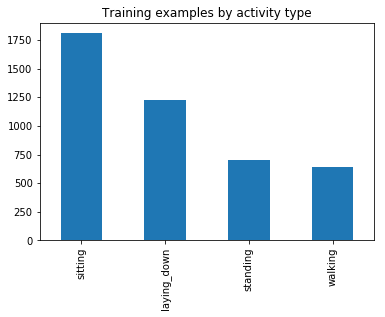

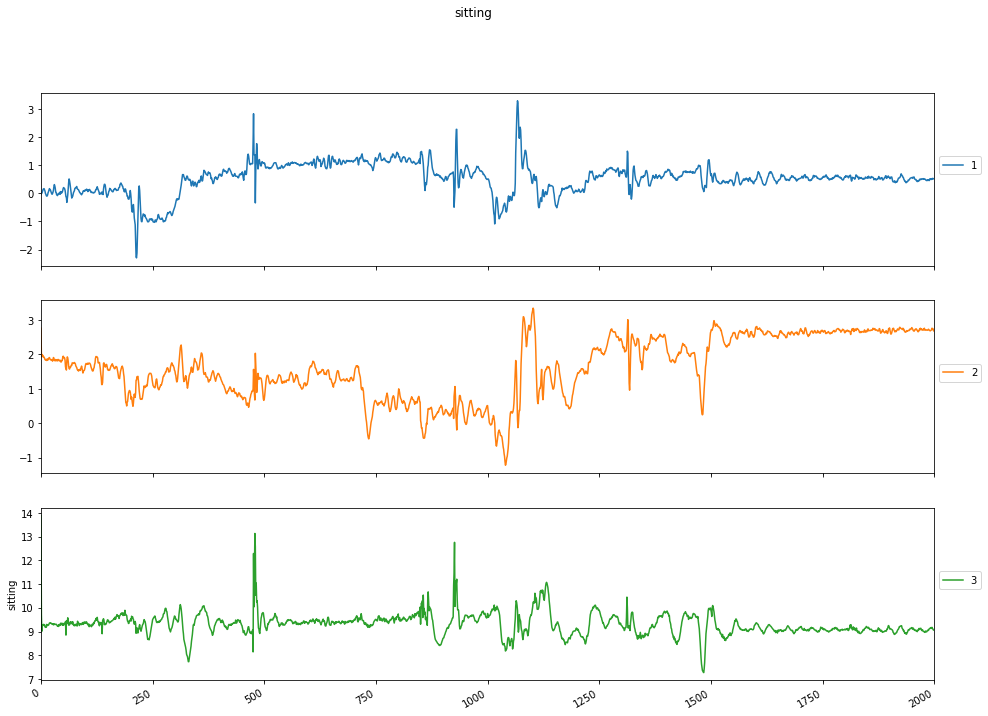

TypeError: Empty 'DataFrame': no numeric data to plot

In [40]:
hist_activities(acc_gy_df)
plot_act_signals(in_df_ac)

combined_df = acc_gy_df
combined_df = combined_df.iloc[np.random.permutation(len(combined_df))]
combined_df.head()

In [41]:
data = combined_df[acc_columns + gy_columns].as_matrix()
targets = data[:, -1]
data = data[:, :-1]

std_scale = preprocessing.StandardScaler().fit(data)
data_std = std_scale.transform(data)

print(len(data_std), len(data_std[0]))
print(len(targets))

NameError: name 'combined_df' is not defined

In [ ]:
cache = {'laying_down' : 0, 'sitting' : 1, 'walking' : 2, 'standing' : 3}
targets.reshape(len(targets))
print(targets)
print(targets.shape)

In [ ]:
bin_targets = []
for i in targets:
    bin_targets.append(cache[i])
print(len(bin_targets))

In [ ]:
bin_targets[: 5]

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
        
acc = cross_val_score(clf, data_std, bin_targets, cv=10)
print acc
print "Score:",np.mean(acc)*100